# MNIST

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from emnist import extract_test_samples
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os

- Load data

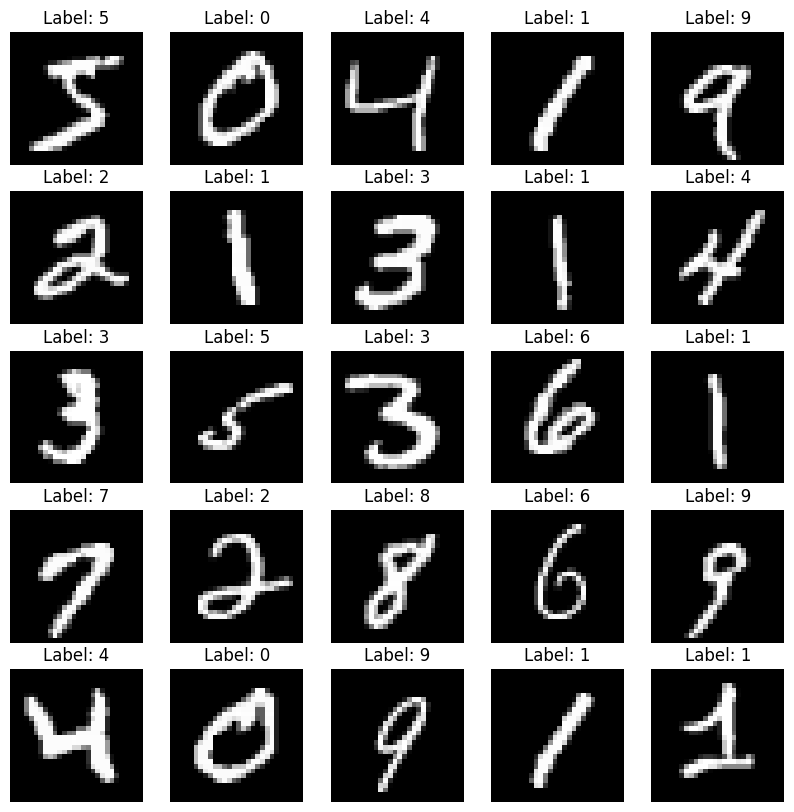

In [23]:
# Display some random images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [24]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

- Creating Tensorflow model

In [27]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu', name = 'MNIST_dense_layer'))
model.add(layers.Dense(10, activation='softmax'))

In [28]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
# Train the model on the MNIST dataset
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 3.4665 - accuracy: 0.8482 - val_loss: 0.6745 - val_accuracy: 0.8777
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.4855 - accuracy: 0.8997 - val_loss: 0.4484 - val_accuracy: 0.9083
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3123 - accuracy: 0.9261 - val_loss: 0.3752 - val_accuracy: 0.9258
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2448 - accuracy: 0.9399 - val_loss: 0.3361 - val_accuracy: 0.9308
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2091 - accuracy: 0.9460 - val_loss: 0.3239 - val_accuracy: 0.9383
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1911 - accuracy: 0.9502 - val_loss: 0.3144 - val_accuracy: 0.9365
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1912 - accuracy: 0.9516 - val_loss: 0.2662 - val_accuracy: 0.9452
Epoch 

- Model evaluation on MNIST data

In [30]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

  1/313 [..............................] - ETA: 7s - loss: 0.1255 - accuracy: 0.9688

313/313 [==============================] - 0s 1ms/step - loss: 0.2449 - accuracy: 0.9463
Test accuracy: 0.9463000297546387


In [31]:
test_label_predict = model.predict(test_images)
test_label_predict = tf.argmax(test_label_predict, axis=1).numpy()

313/313 [==============================] - 1s 1ms/step


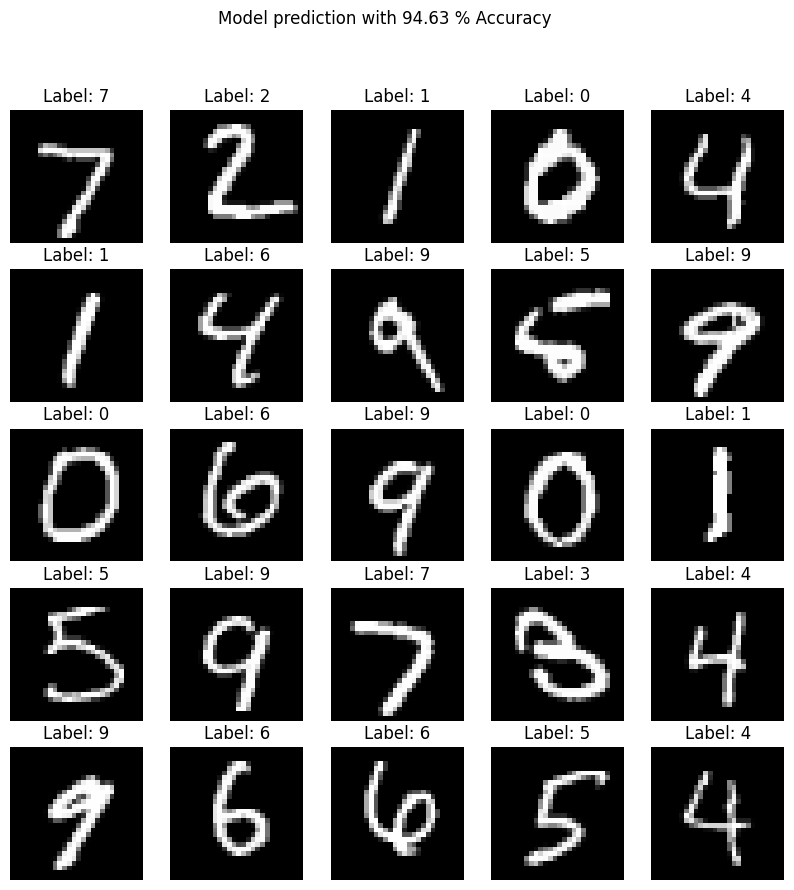

In [33]:
# Display some random images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Label: {test_label_predict[i]}")
    plt.axis('off')
    plt.suptitle('Model prediction with {} % Accuracy'.format(round((test_acc*100),2)))
plt.show()

- Saving trained model

In [34]:
model_json = model.to_json()
# Check if directory exists
if os.path.isdir('saved_model') == False:
    os.mkdir('saved_model')     
# Saving model to JSON
with open("saved_model/MNIST_trained.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("saved_model/MNIST_trained_weights.h5","w")